In [8]:
# 定位和受灾情况可视化
from pprint import pprint
from utils import label_from_file
import torch
from torchvision import transforms
def set_color(a:torch.Tensor, color:tuple[int,int,int])->torch.Tensor:
    return torch.stack([i*a for i in color], dim=0)
toPIL = transforms.ToPILImage()
img = label_from_file("../data/labels/hurricane-harvey_00000177_pre_disaster.json") * 255
pic = toPIL(img)
pic.save("loc.png")
img = label_from_file("../data/labels/hurricane-harvey_00000177_post_disaster.json")
new_img = torch.zeros((3,1024,1024))
a = set_color(img[0], (142,207,201))
b = set_color(img[1], (130,176,210))
c = set_color(img[2], (255,190,122))
d = set_color(img[3], (250,127,111))
new_img = a+b+c+d
pic = toPIL(new_img)
pic.save("diff.png")

In [11]:
# 描述性统计
import os
import json
import matplotlib.pyplot as plt
label_list = [file for file in os.listdir("../data/labels") if "post" in file]
print(len(label_list))
subtype_dict = {}
prefix_dict = {}
for file in label_list:
    prefix = file.split("_")[0]
    if not prefix in prefix_dict:
            prefix_dict[prefix] = 1
    else:
            prefix_dict[prefix] = prefix_dict[prefix] + 1
    with open("../data/labels/" + file) as f:
        j = json.load(f)
        j = j["features"]["xy"]
        for k in j:
            subtype = k["properties"]["subtype"]
            if not subtype in subtype_dict:
                subtype_dict[subtype] = 1
            else:
                subtype_dict[subtype] = subtype_dict[subtype] + 1
pprint(subtype_dict)
pprint(prefix_dict)

2799
{'destroyed': 13227,
 'major-damage': 14161,
 'minor-damage': 14980,
 'no-damage': 117426,
 'un-classified': 2993}
{'guatemala-volcano': 18,
 'hurricane-florence': 319,
 'hurricane-harvey': 319,
 'hurricane-matthew': 238,
 'hurricane-michael': 343,
 'mexico-earthquake': 121,
 'midwest-flooding': 279,
 'palu-tsunami': 113,
 'santa-rosa-wildfire': 226,
 'socal-fire': 823}


In [16]:
import os
from utils import label_from_file
import matplotlib.pyplot as plt
label_list = [file for file in os.listdir("../data/labels") if "pre" in file]
rate_list = []
for file in label_list:
    file_path = "../data/labels/" + file
    temp = label_from_file(file_path)
    temp_rate = temp.sum() / (temp.shape[0] * temp.shape[1] * temp.shape[2])
    rate_list.append(temp_rate)


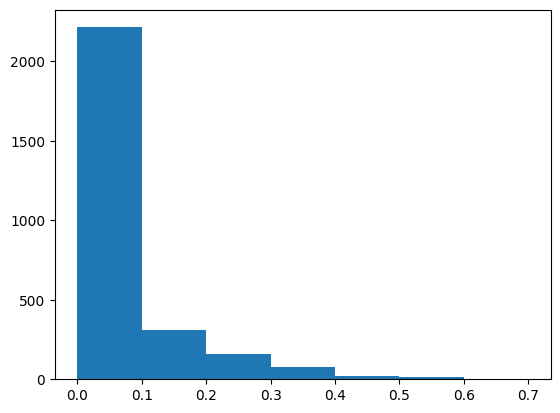

2214


In [26]:
import matplotlib.ticker as mtick
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

plt.hist(rate_list, bins)
plt.show()
print(len([i for i in rate_list if i<0.1]))

<BarContainer object of 5 artists>

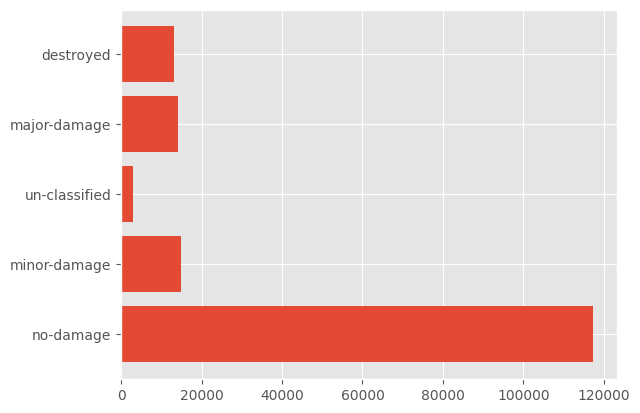

In [21]:
plt.barh(list(subtype_dict.keys()),subtype_dict.values())

<BarContainer object of 10 artists>

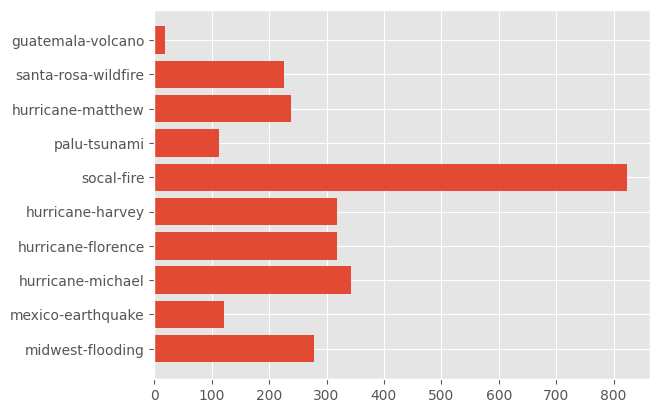

In [20]:
plt.barh(list(prefix_dict.keys()),prefix_dict.values())

In [1]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
i = 0
err_locD = {}
err_locG = {}
err_diffD = {}
err_diffG = {}
for e in summary_iterator('../run_final/train/events.out.tfevents.1681023744.autodl-container-b2ce11a5ae-38717b30.901683.0'):
    for v in e.summary.value:
        if v.tag == "err_locD":
            err_locD[e.step] = v.simple_value
        elif v.tag == "err_locG":
            err_locG[e.step] = v.simple_value
        elif v.tag == "err_diffD":
            err_diffD[e.step] = v.simple_value
        elif v.tag == "err_diffG":
            err_diffG[e.step] = v.simple_value

index = list(err_locD)
err_locD = list(err_locD.values())
err_locG = list(err_locG.values())
err_diffD = list(err_diffD.values())
err_diffG = list(err_diffG.values())

2023-04-18 04:30:55.335834: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

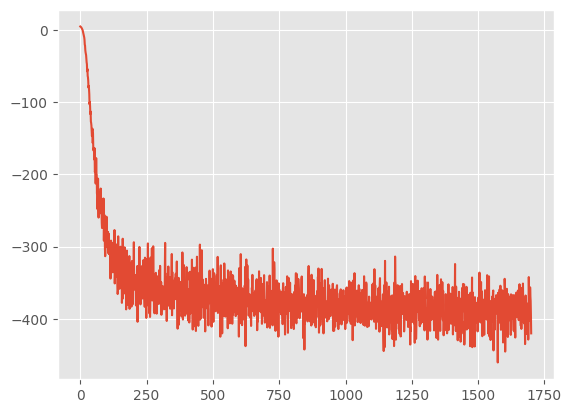

In [3]:
from scipy.interpolate import interp1d
cubic_interploation_model=interp1d(index, err_locD, kind="cubic")
plt.plot(index, err_locD)
plt.show()

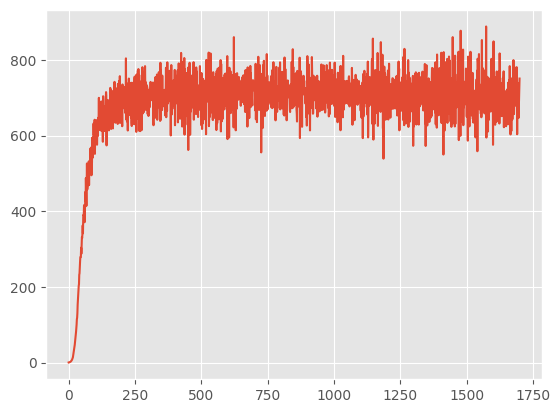

In [4]:
plt.plot(index, err_locG)
plt.show()

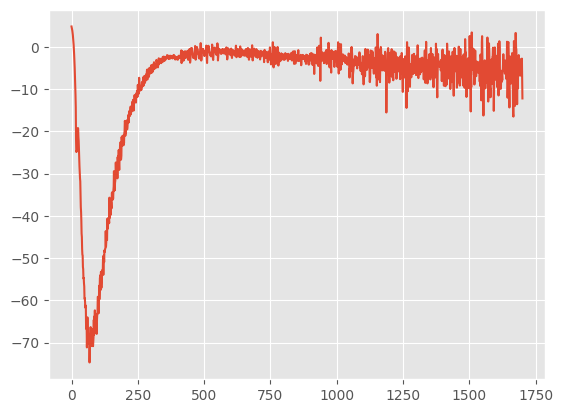

In [5]:
plt.plot(index, err_diffD)
plt.show()

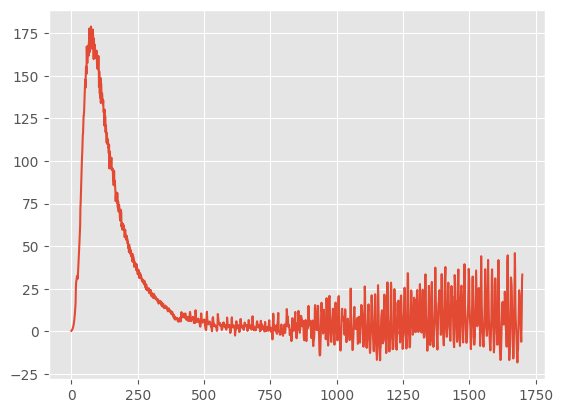

In [6]:
plt.plot(index, err_diffG)
plt.show()